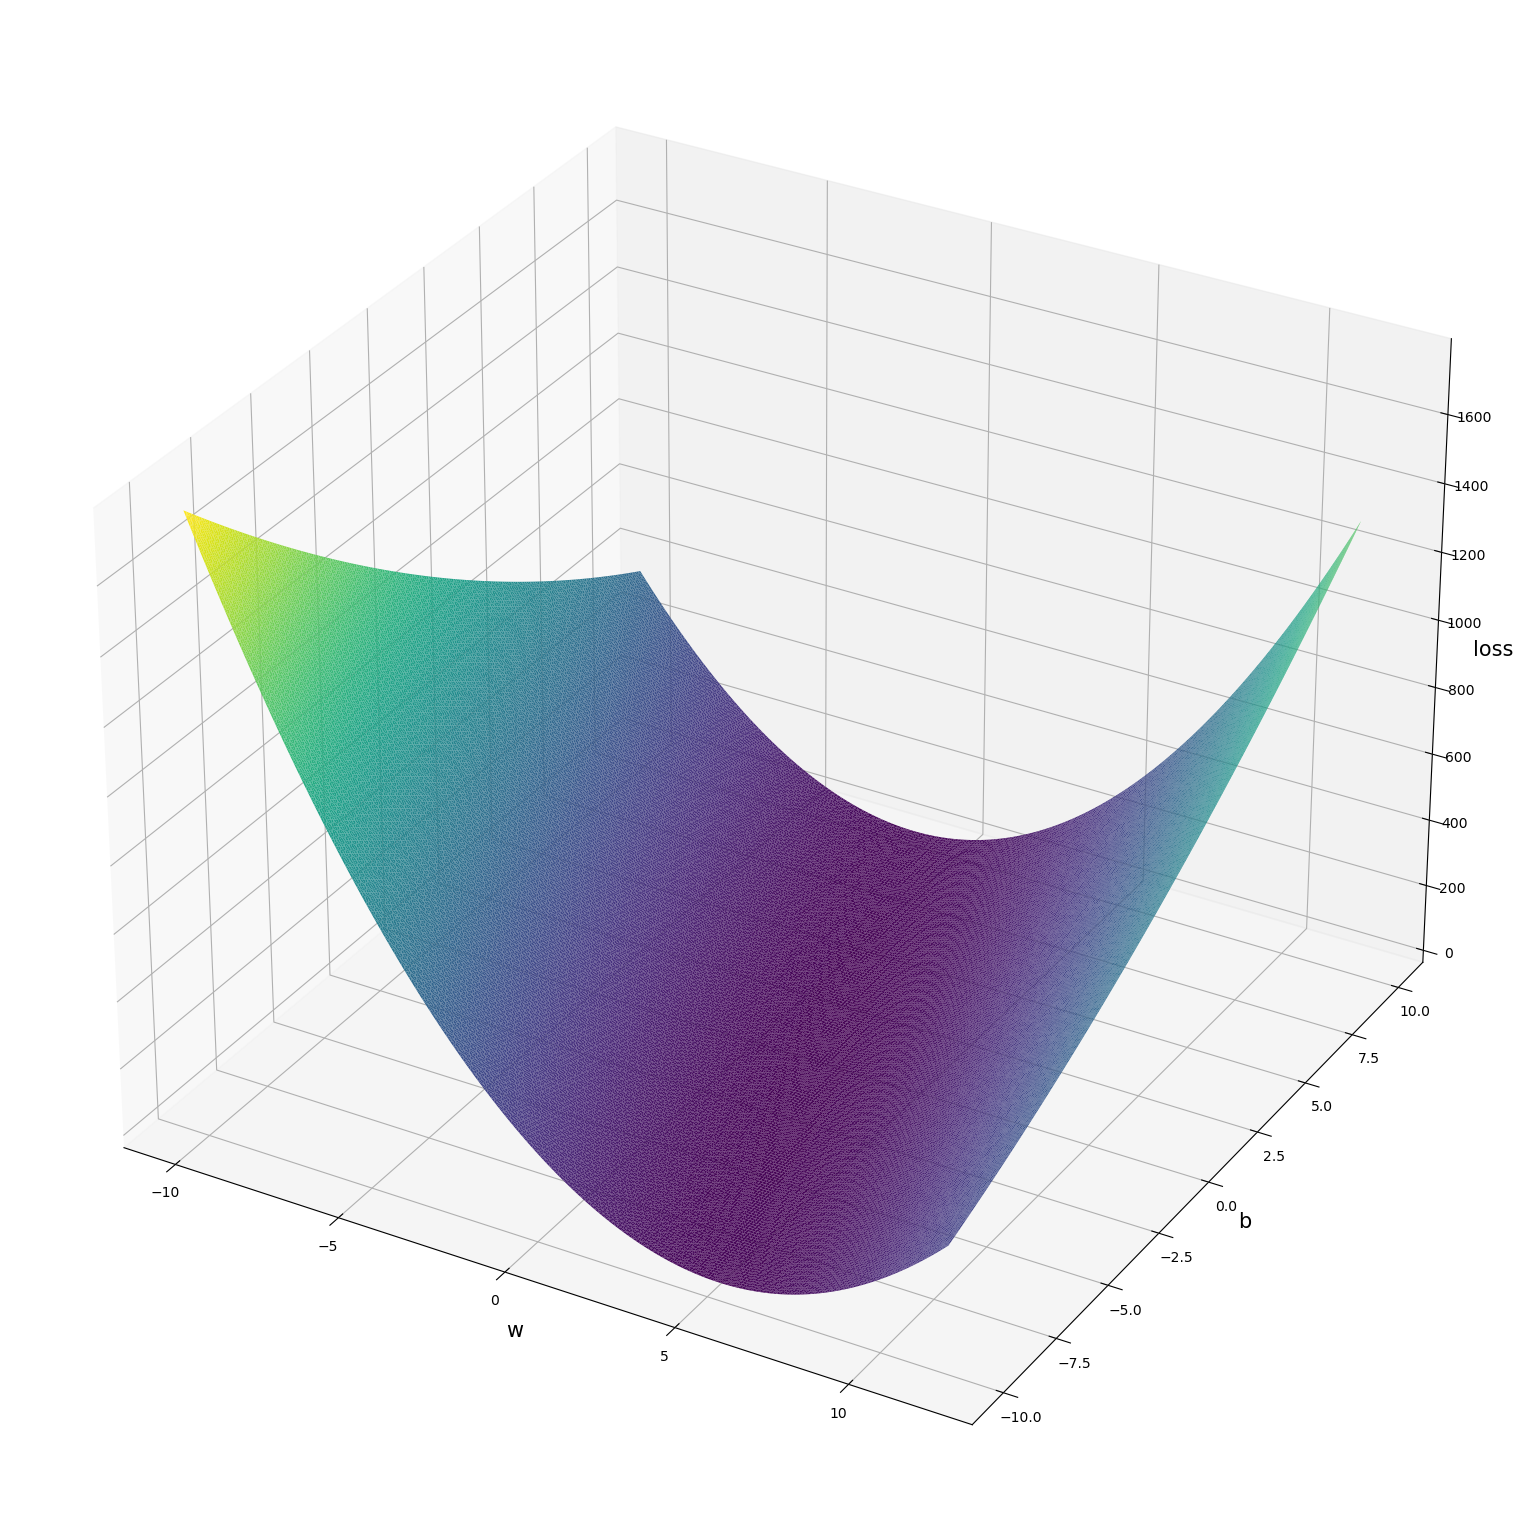

MES w=  2.0 MES b=  -0.0


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,20), dpi = 100)
ax = fig.add_subplot(projection='3d')

x_date = [1.0,2.0,3.0,4.0]
y_date = [2.0,4.0,6.0,8.0]

def model(x_date, w):
    return x_date*w + b

def loss_function(x_date, y_date, w):
    y_pred = model(x_date, w)
    return pow(y_pred-y_date, 2)

w_list = list()
MES_list = list()
b_list = list()

for b in np.arange(-10, 10, 0.1):
    for w in np.arange(-10, 12, 0.1):
        loss_sum = 0
        for x_val,y_val in zip(x_date,y_date):
            loss_val = loss_function(x_val, y_val, w)
            loss_sum += loss_val
        w_list.append(w) 
        b_list.append(b)
        MES_list.append(loss_sum / len(x_date))


ax.plot_trisurf(w_list, b_list, MES_list, cmap='viridis', edgecolor='none')
ax.set_xlabel("w", size = 15)
ax.set_ylabel("b", size = 15)
ax.set_zlabel("loss", size = 15)

plt.show()
print("MES w= ","%.1f"%w_list[np.argmin(MES_list)],"MES b= ","%.1f"%b_list[np.argmin(MES_list)])

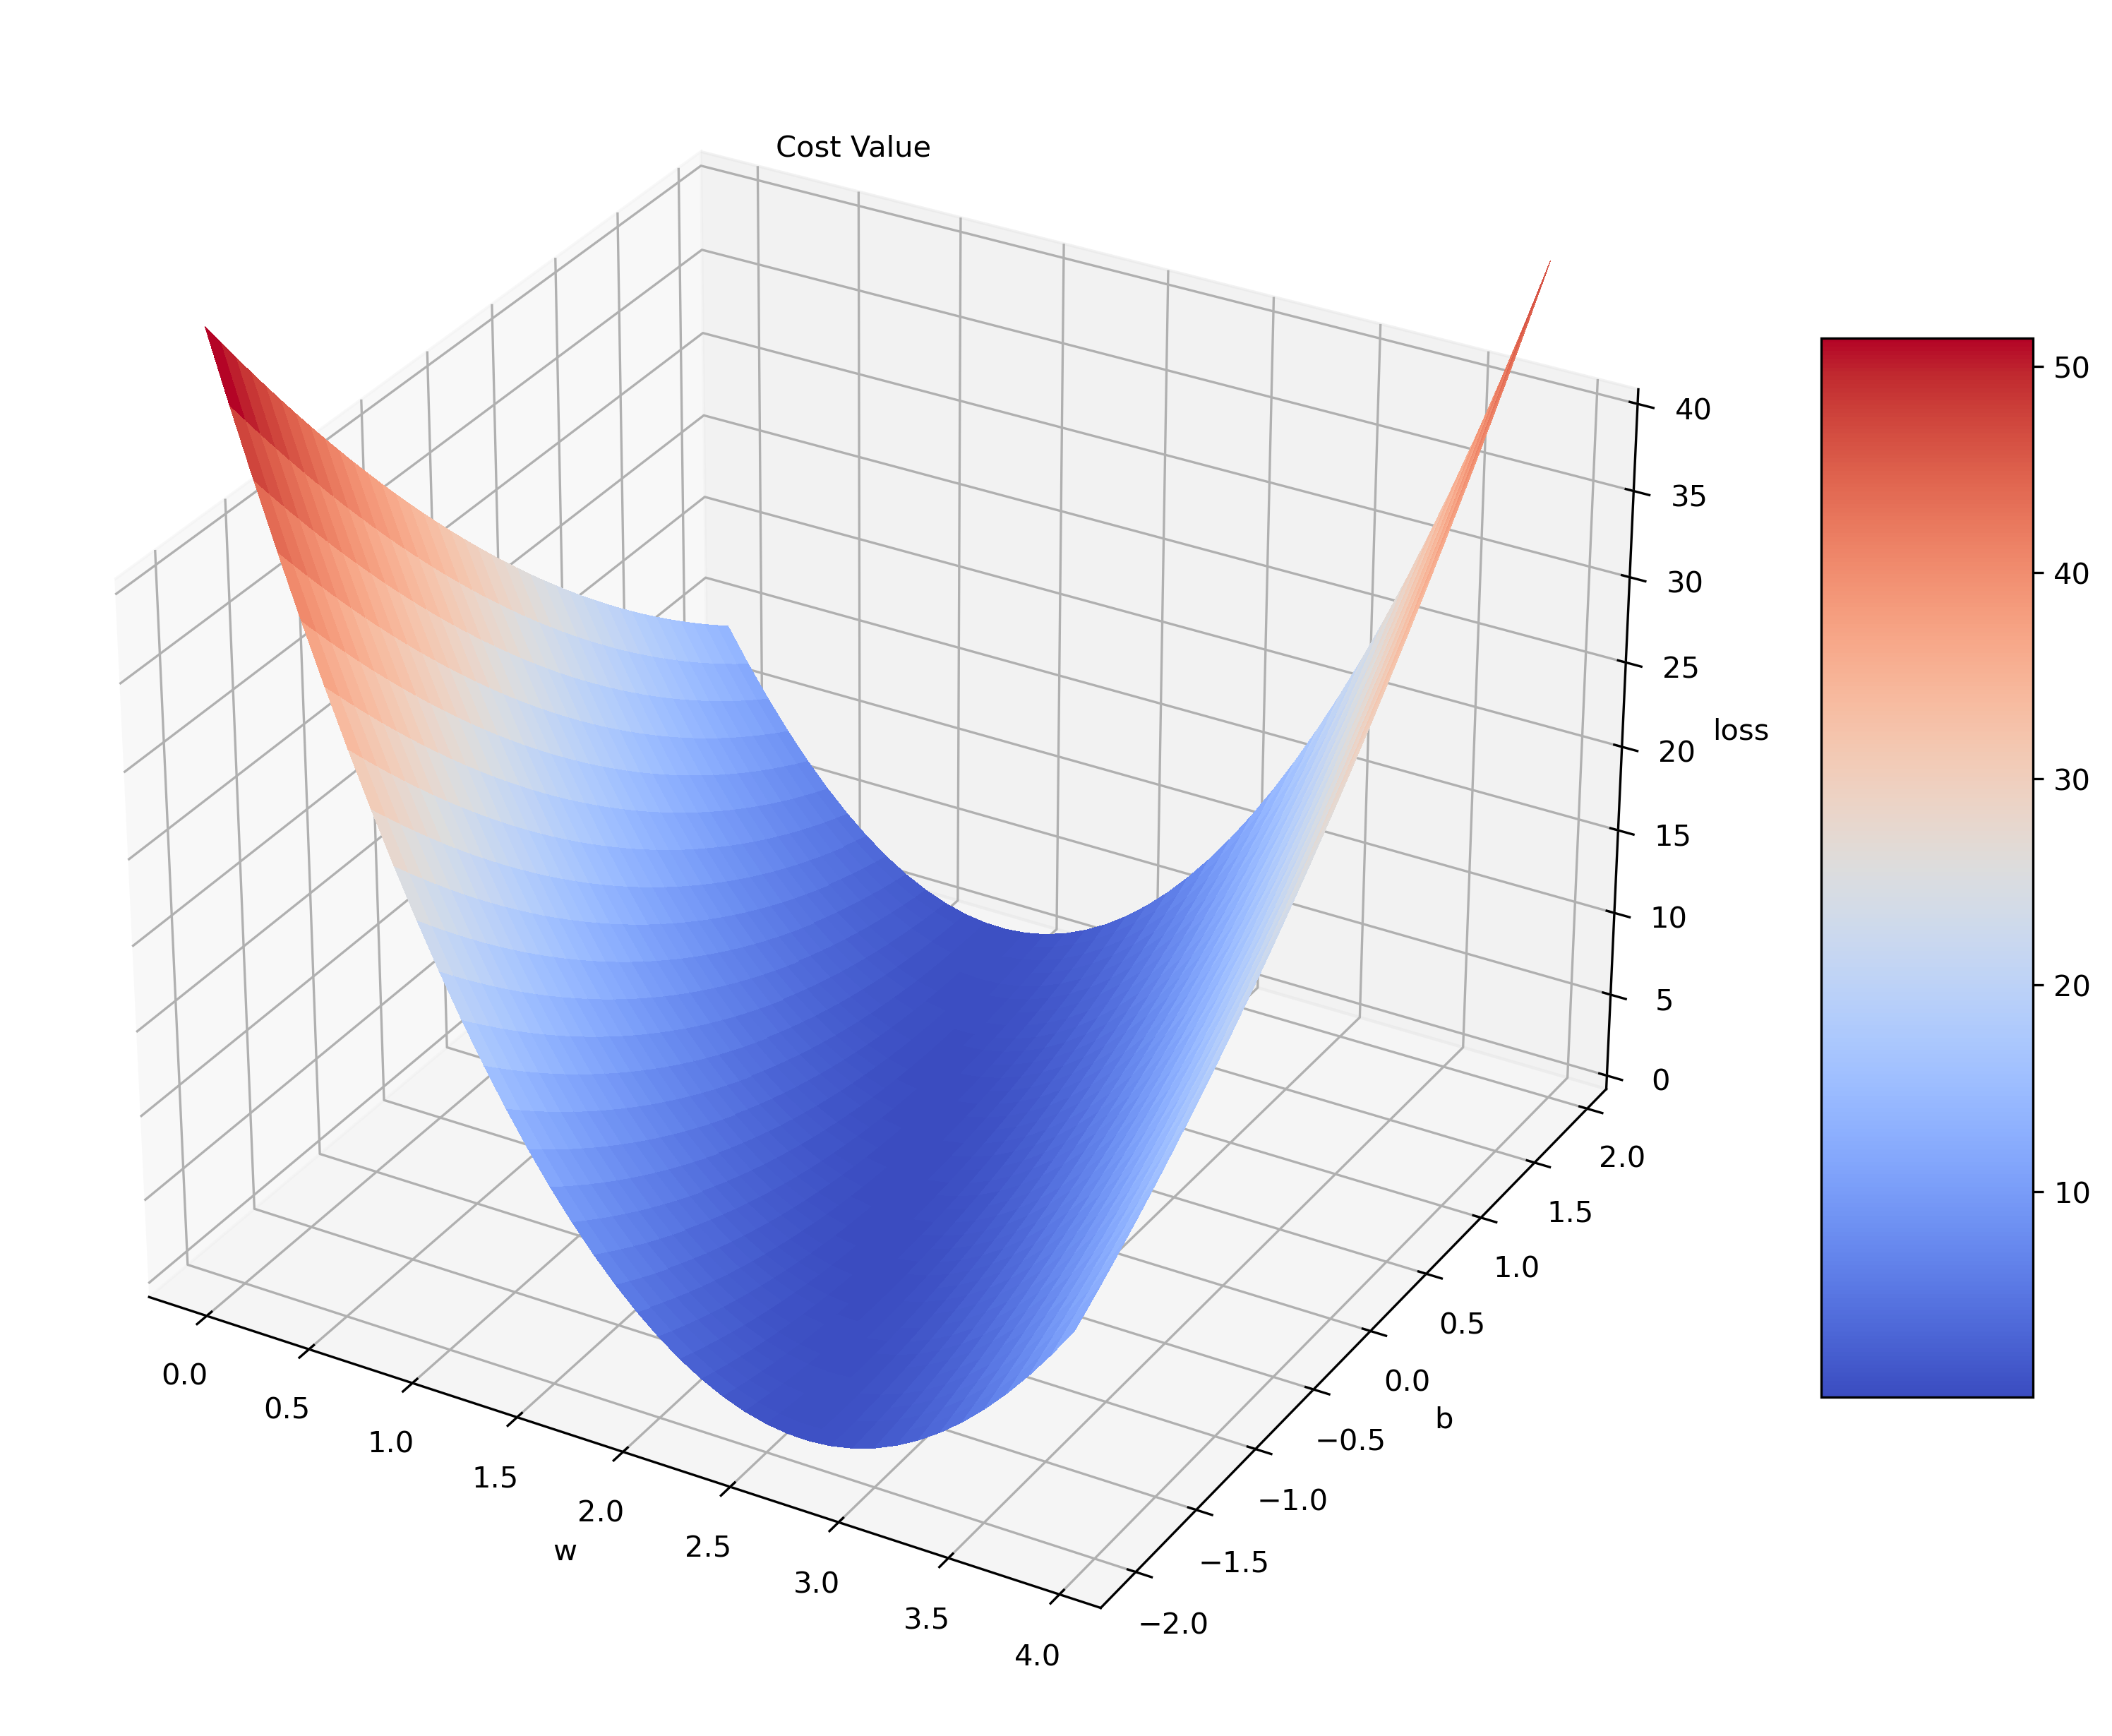

820
w =  2.0
b =  0.0


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
x_date = [1.0,2.0,3.0,4.0]
y_date = [2.0,4.0,6.0,8.0]

def model(x_date, w, b):
    return x_date * w + b

def loss_function(x_date, y_date, w, b):
    y_pred = model(x_date, w, b)
    return pow(y_pred-y_date, 2)

w_list = np.arange(0, 4, 0.1)
MES_list = np.array([0])
b_list = np.arange(-2, 2, 0.1)
w, b = np.meshgrid(w_list, b_list, indexing='ij') # 构建矩阵坐标

loss_sum = 0
for x_val,y_val in zip(x_date,y_date):
    loss_val = loss_function(x_val, y_val, w, b)
    loss_sum += loss_val
MES_list = (loss_sum / len(x_date))

# 定义figure
fig = plt.figure(figsize=(10,10), dpi=300)
# 将figure变为3d
ax = Axes3D(fig)
# 绘图，rstride:行之间的跨度  cstride:列之间的跨度
surf = ax.plot_surface(w, b, MES_list, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 40)
# 设置坐标轴标签
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("loss")
ax.text(0.2, 2, 43, "Cost Value", color='black')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
print(MES_list.argmin())

print("w = ","%.1f"%w[math.ceil(MES_list.argmin()/40)-1][MES_list.argmin()%40-1])
print("b = ","%.1f"%b[MES_list.argmin()%40-1][math.ceil(MES_list.argmin()/40)-1])

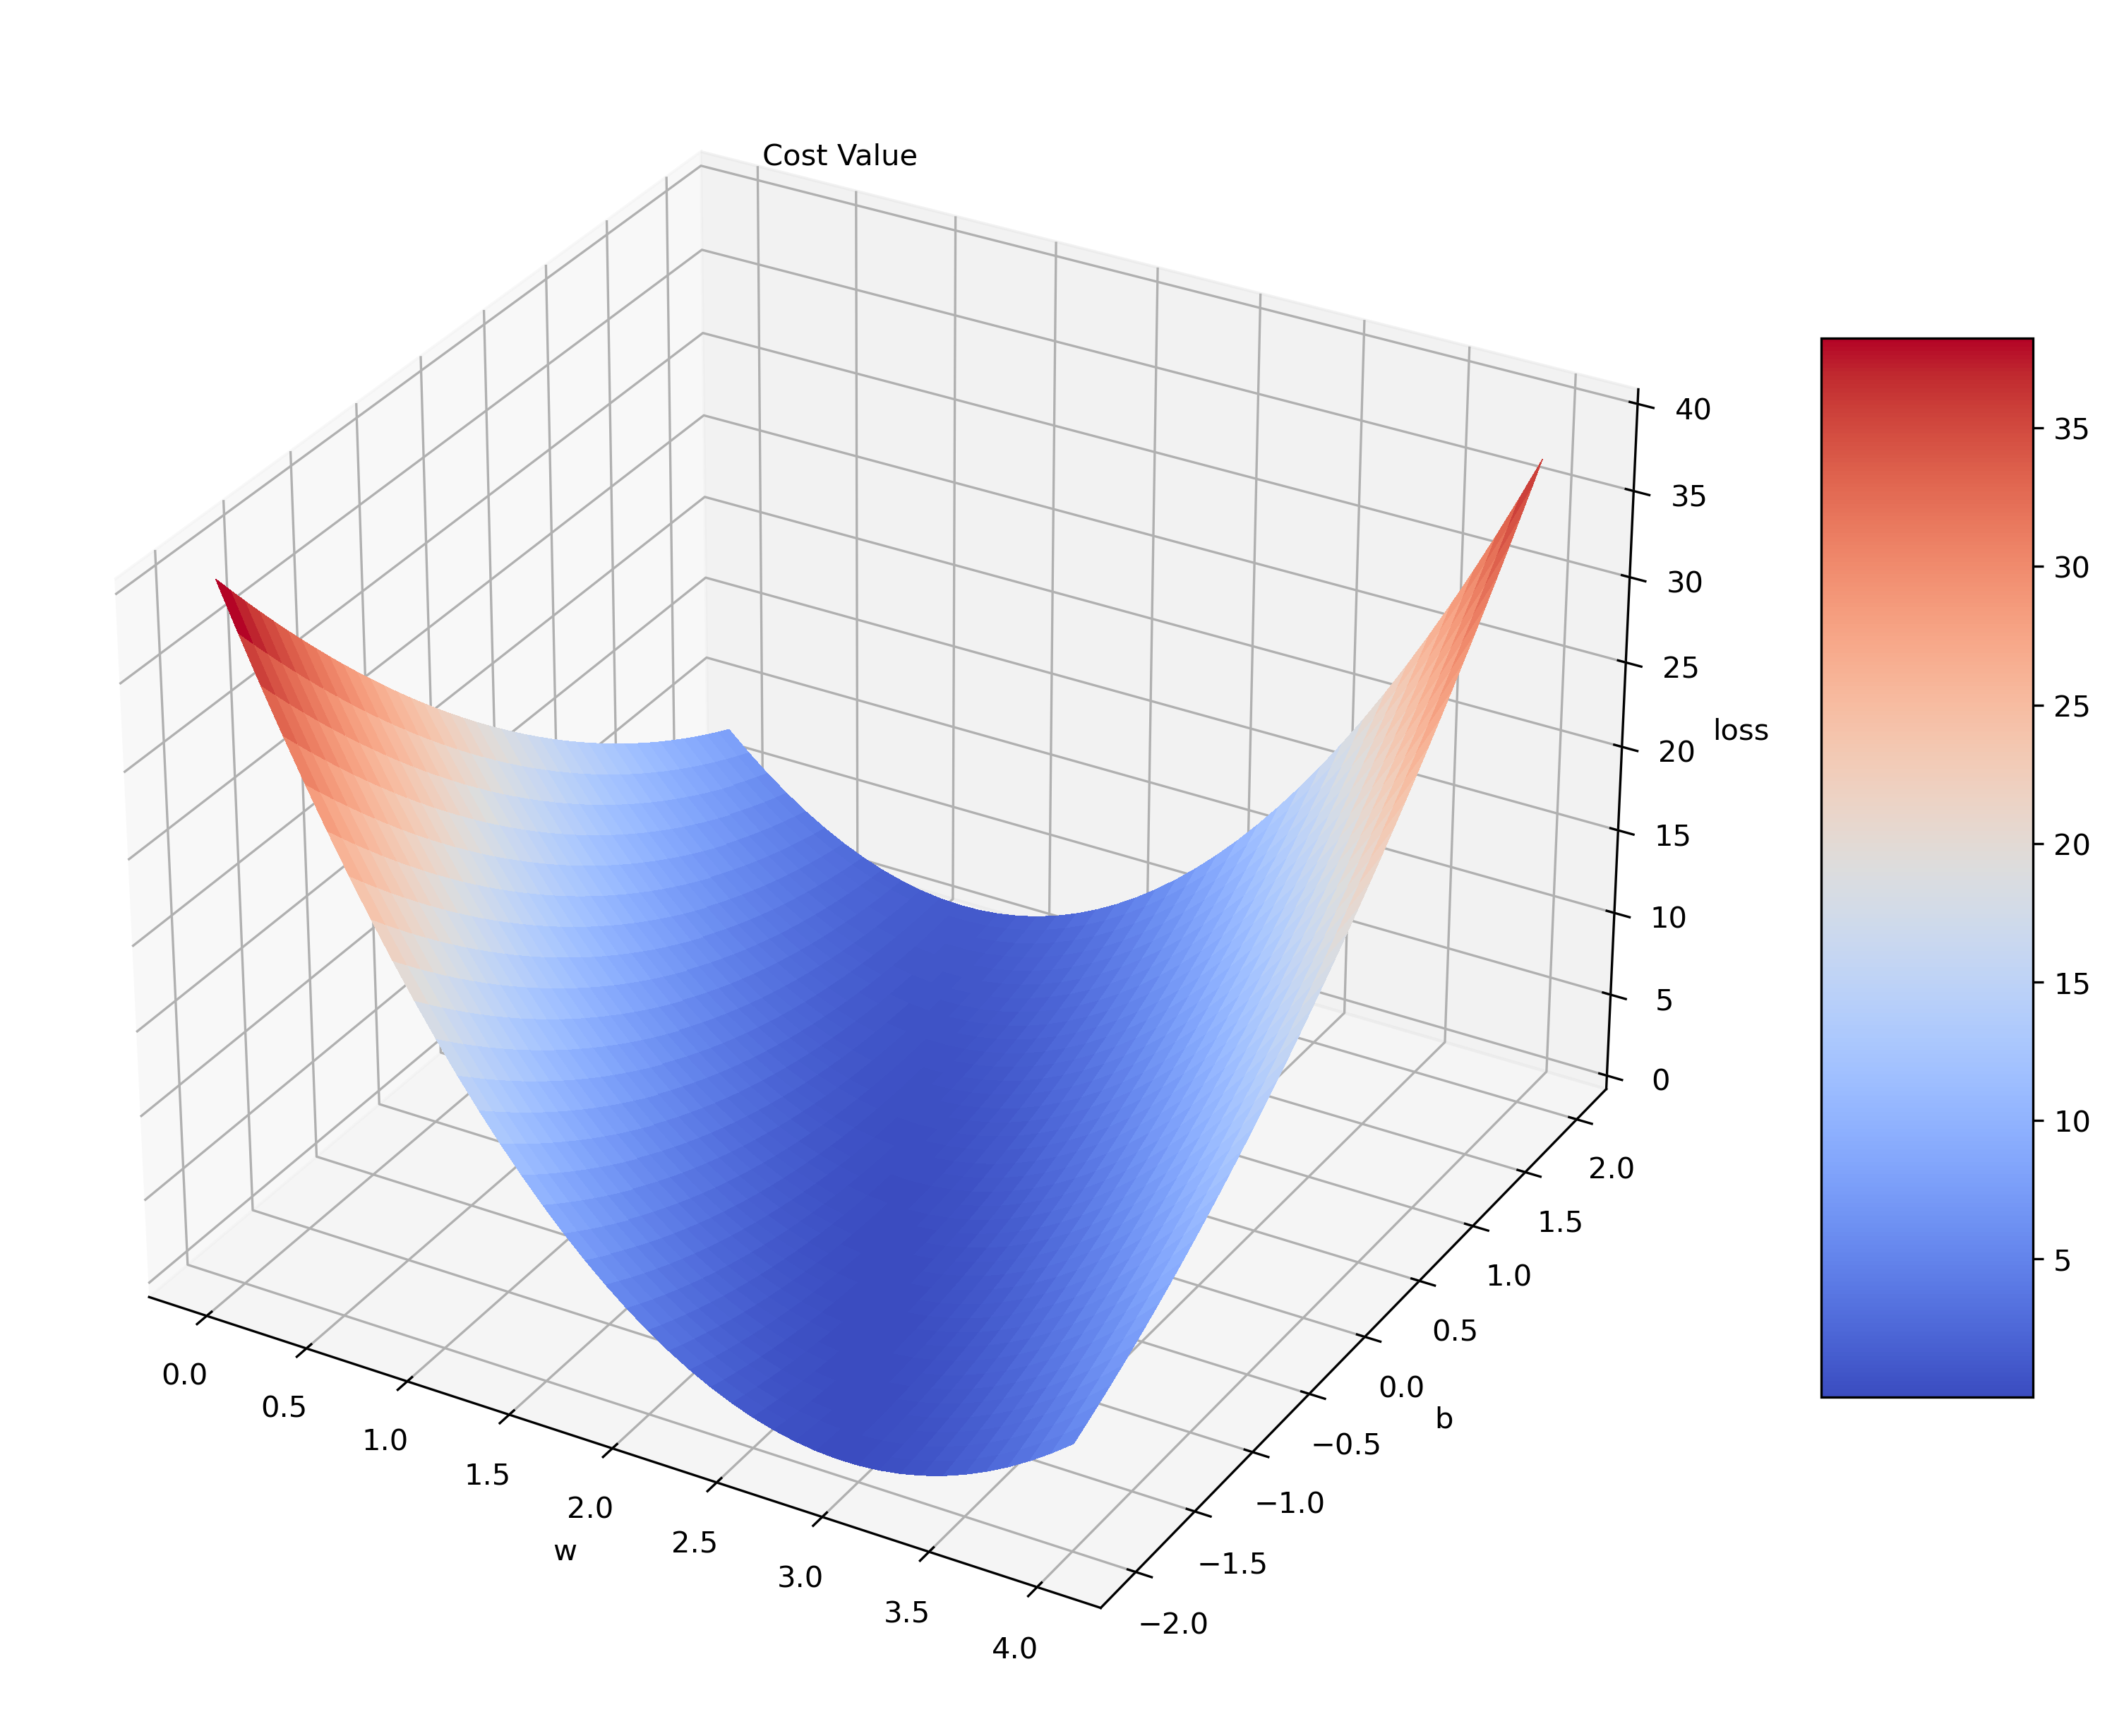

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# y = x*2.5-1 构造训练数据
x_data = [1.0, 2.0, 3.0]
y_data = [1.5, 4.0, 6.5]
W, B = np.arange(0.0, 4.1, 0.1), np.arange(-2.0, 2.1, 0.1) # 规定 W,B 的区间
w, b = np.meshgrid(W, B, indexing='ij') # 构建矩阵坐标

def forward(x):
    return x*w+b
    
def loss(y_pred, y):
    return (y_pred-y) ** 2

# Make data.
mse_lst = []
l_sum = 0

for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    loss_val = loss(y_pred_val, y_val)
    l_sum += loss_val
    # print(l_sum)

mse_lst.append(l_sum/3)
mse_lst = np.array(mse_lst[0])

# 定义figure
fig = plt.figure(figsize=(10,10), dpi=300)
# 将figure变为3d
ax = Axes3D(fig)
# 绘图，rstride:行之间的跨度  cstride:列之间的跨度
surf = ax.plot_surface(w, b, mse_lst, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 40)
# 设置坐标轴标签
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("loss")
ax.text(0.2, 2, 43, "Cost Value", color='black')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()